<h1>Identificando a espécie de uma flor a partir de suas medidas</h1>

In [40]:
# parâmetro para exibição dos gráfico nesse arquivo
%matplotlib inline
from sklearn.datasets import load_iris as dados  # importação do dataset da flor íris
from sklearn.model_selection import train_test_split  # dividirá os dados em 2 conjuntos: treino e teste
from sklearn.neighbors import KNeighborsClassifier  # algoritmo que decide baseado em valores próximos a um dado vizinho
import matplotlib.pyplot as plt  # capaz de gerar os gráficos
import numpy as np  # para processamento numérico

In [55]:
dados_da_iris = dados()  # pego os dados do dataset 
dados_da_iris.keys()  # descubro quais as chaves/atributos desses dados

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [57]:
print(dados_da_iris['DESCR'][:200] )  # exibo o conteúdo limitando a string em 200 chars

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes


In [60]:
dados_da_iris['target_names']  # tipos de flores íris - resultado esperado
# dtype='<U10' a maior das palavras possui 10 chars.

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [61]:
dados_da_iris['feature_names'] # nomes das características - 4

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [113]:
print(dados_da_iris['data'].shape)  # a função shape retona o tamanho 
dados_da_iris['data'][:3]  # exibo 3 samples/amostras - limitando a saída em 10 posições

(150, 4)


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2]])

In [112]:
# exibe o numpy array contendo 150 linhas com valores que vão de 0 a 2.
# com os resultados, respectivimente, de cada linha
# 0 = Setosa
# 1 = Versicolor
# 2 = Virginica
dados_da_iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
# conjuntos de treino e teste
# divisão dos dados em treino 75% e teste 25%
# em X teremos as amostras e em Y os resultados
X_train, X_test, y_train, y_test = train_test_split(dados_da_iris['data'], dados_da_iris['target'], random_state = 0)

print(X_train.shape)  # somente para verificarmos os tamanhos de cada
print(X_test.shape)

(112, 4)
(38, 4)


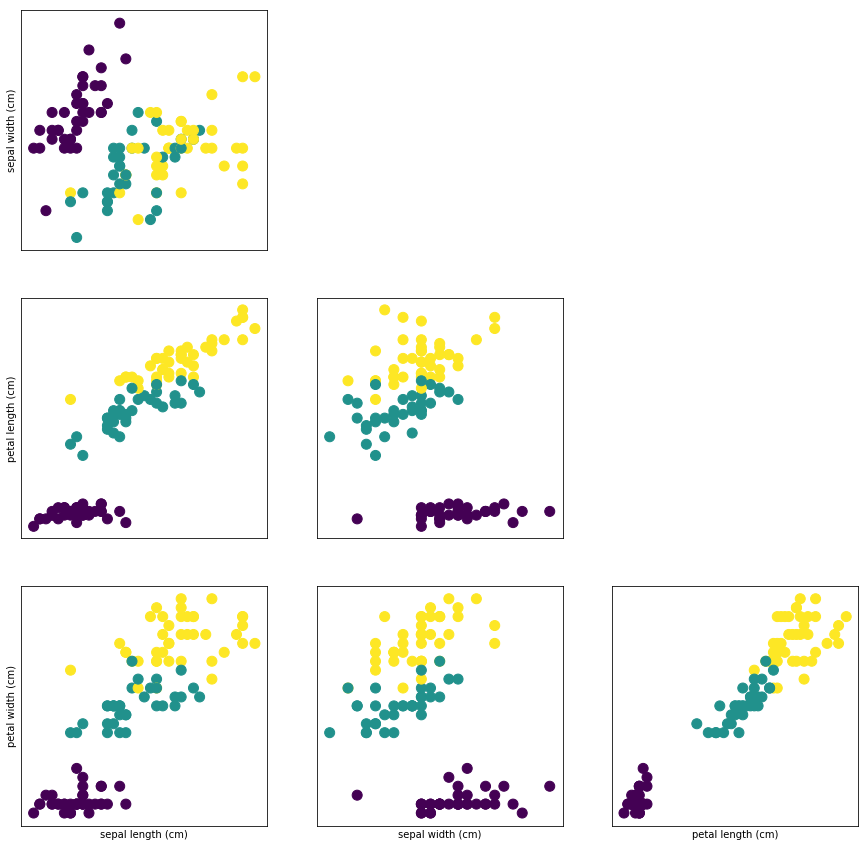

In [95]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j], X_train[:, i + 1], c=y_train, s=100)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        
        if i == 2:
            ax[i,j].set_xlabel(dados_da_iris['feature_names'][j])
        if j == 0:
            ax[i,j].set_ylabel(dados_da_iris['feature_names'][i + 1])
        if j > i:
            ax[i,j].set_visible(False)

In [116]:
# Criando o modelo de classificação
"""
O KNN funciona da seguinte forma: primeiro, ele mapeia os dados já contidos no dataset. 
Depois, quando o modelo está pronto e novas informações são inseridas para serem previstas, 
o código verifica qual ponto mais próximo daquele novo dado
"""
modelo_knn = KNeighborsClassifier(n_neighbors = 1)  # cria o modelo e indica a qtd de vizinhos a ser considerada
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [136]:
# testando o modelo preditivo
pos10 = [[ 5.4,  3.7,  1.5,  0.2]] # deve retornar 0 Setosa
pos60 = [[ 5. ,  2. ,  3.5,  1. ]] # = 1 Versicolor
pos100 = [[ 6.3,  3.3,  6. ,  2.5]] # = 2 Virginica
X_new = np.array(pos10)
X_new.shape

(1, 4)

In [137]:
predicao = modelo_knn.predict(X_new)
predicao

array([0])

In [138]:
# ao invés de ficar conferindo qual corresponde a qual, verificamos direto
dados_da_iris['target_names'][predicao]

array(['setosa'],
      dtype='<U10')

In [139]:
# verificação da precisão do algoritmo nesse conjunto de dados 
modelo_knn.score(X_test, y_test)

0.97368421052631582